# Analysis of CSEd Success Metrics with Each Policy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#df = pd.read_csv('StatePoliciesWithDemographic2.csv')
df = pd.read_csv("https://raw.githubusercontent.com/lgtanimoto/CSed2021Data/main/StatePoliciesWithDemographic2.csv")
print (df.head())

  StateAbbv   StateName P1_StatePlan P2_Standards P3_Funding P4_Certification  \
0        AK      Alaska           No          Yes         No               No   
1        AL     Alabama  In progress          Yes        Yes              Yes   
2        AR    Arkansas          Yes          Yes        Yes              Yes   
3        AZ     Arizona           No          Yes        Yes              Yes   
4        CA  California          Yes          Yes        Yes              Yes   

  P5_PreserviceIncentives P6_StateCSposition P7_RequireHStoOffer  \
0                      No                 No                  No   
1                     Yes                Yes                 Yes   
2                     Yes                Yes                 Yes   
3                      No        In Progress                  No   
4                      No                 No                  No   

     P8_CountGradReq  ... AP_Black  AP_HLLL  AP_Native  AP_HPI  AP_Asian  \
0  District Decision  ...   

In [2]:
df.dtypes

StateAbbv                   object
StateName                   object
P1_StatePlan                object
P2_Standards                object
P3_Funding                  object
P4_Certification            object
P5_PreserviceIncentives     object
P6_StateCSposition          object
P7_RequireHStoOffer         object
P8_CountGradReq             object
P9_HigherEdAdmission        object
PctReportedFCS             float64
YearOfLast                   int64
NumOfHS                      int64
NumHSWithCS                  int64
PctHSwFCS                  float64
TotalStudents                int64
NumStudentsinHSwCS           int64
PctStudentsHSwCS           float64
Total_Black                  int64
Total_HLLL                   int64
Total_Native                 int64
Total_HPI                    int64
Total_White                  int64
Total_Asian                  int64
Total_TwoPlus                int64
InCSHS_Black                 int64
InCSHS_HLLL                  int64
InCSHS_Native       

In [3]:
# Calculate percentages for FCS and AP participation

df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS'] = df['InFCS_Total'] / df['TotalStudents']  # Percentage of students in foundational Computer Science -note only 36 have data
df['Pct_InAP'] = df['AP_Total'] / df['TotalStudents'] # Percentage of students in AP

In [4]:
# Create 0-1 policy information
policies = ['P1_StatePlan','P2_Standards', 'P3_Funding', 'P4_Certification', 'P5_PreserviceIncentives', 'P6_StateCSposition', 'P7_RequireHStoOffer',
'P8_CountGradReq', 'P9_HigherEdAdmission']
policiesB = ["B" + p for p in policies]

print (policiesB)


['BP1_StatePlan', 'BP2_Standards', 'BP3_Funding', 'BP4_Certification', 'BP5_PreserviceIncentives', 'BP6_StateCSposition', 'BP7_RequireHStoOffer', 'BP8_CountGradReq', 'BP9_HigherEdAdmission']


In [5]:
def makeBinary(yesno):
    if (yesno.upper() == 'YES'):
        return 1
    else:
        return 0

In [6]:
for i in range(len(policies)):
    df[policiesB[i]] = df[policies[i]].apply(lambda x:makeBinary(x))

In [7]:
df['NumPolicies']=df[policiesB].sum(axis=1)

In [8]:
dfwork = df[['StateAbbv','StateName','TotalStudents'] + policiesB +['NumPolicies','PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP']].copy()

In [9]:
dfwork.describe()

,TotalStudents,BP1_StatePlan,BP2_Standards,BP3_Funding,BP4_Certification,BP5_PreserviceIncentives,BP6_StateCSposition,BP7_RequireHStoOffer,BP8_CountGradReq,BP9_HigherEdAdmission,NumPolicies,PctHSwFCS,PctStudentsHSwCS,Pct_InFCS,Pct_InAP
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,36.000000,51.000000
mean,3.264598e+05,0.411765,0.764706,0.588235,0.803922,0.411765,0.607843,0.450980,0.705882,0.411765,5.156863,0.573646,0.775800,0.049300,0.008757
std,3.826195e+05,0.497050,0.428403,0.497050,0.400979,0.497050,0.493089,0.502543,0.460179,0.497050,2.444361,0.179145,0.120076,0.034186,0.006010
min,2.082600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239677,0.450771,0.018722,0.000885
25%,9.273900e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.426800,0.708004,0.033200,0.003982
50%,2.413940e+05,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.543735,0.771938,0.039610,0.008358
75%,3.881930e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,0.725754,0.872100,0.052574,0.012420
max,2.013095e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,0.924837,0.982347,0.206658,0.028158


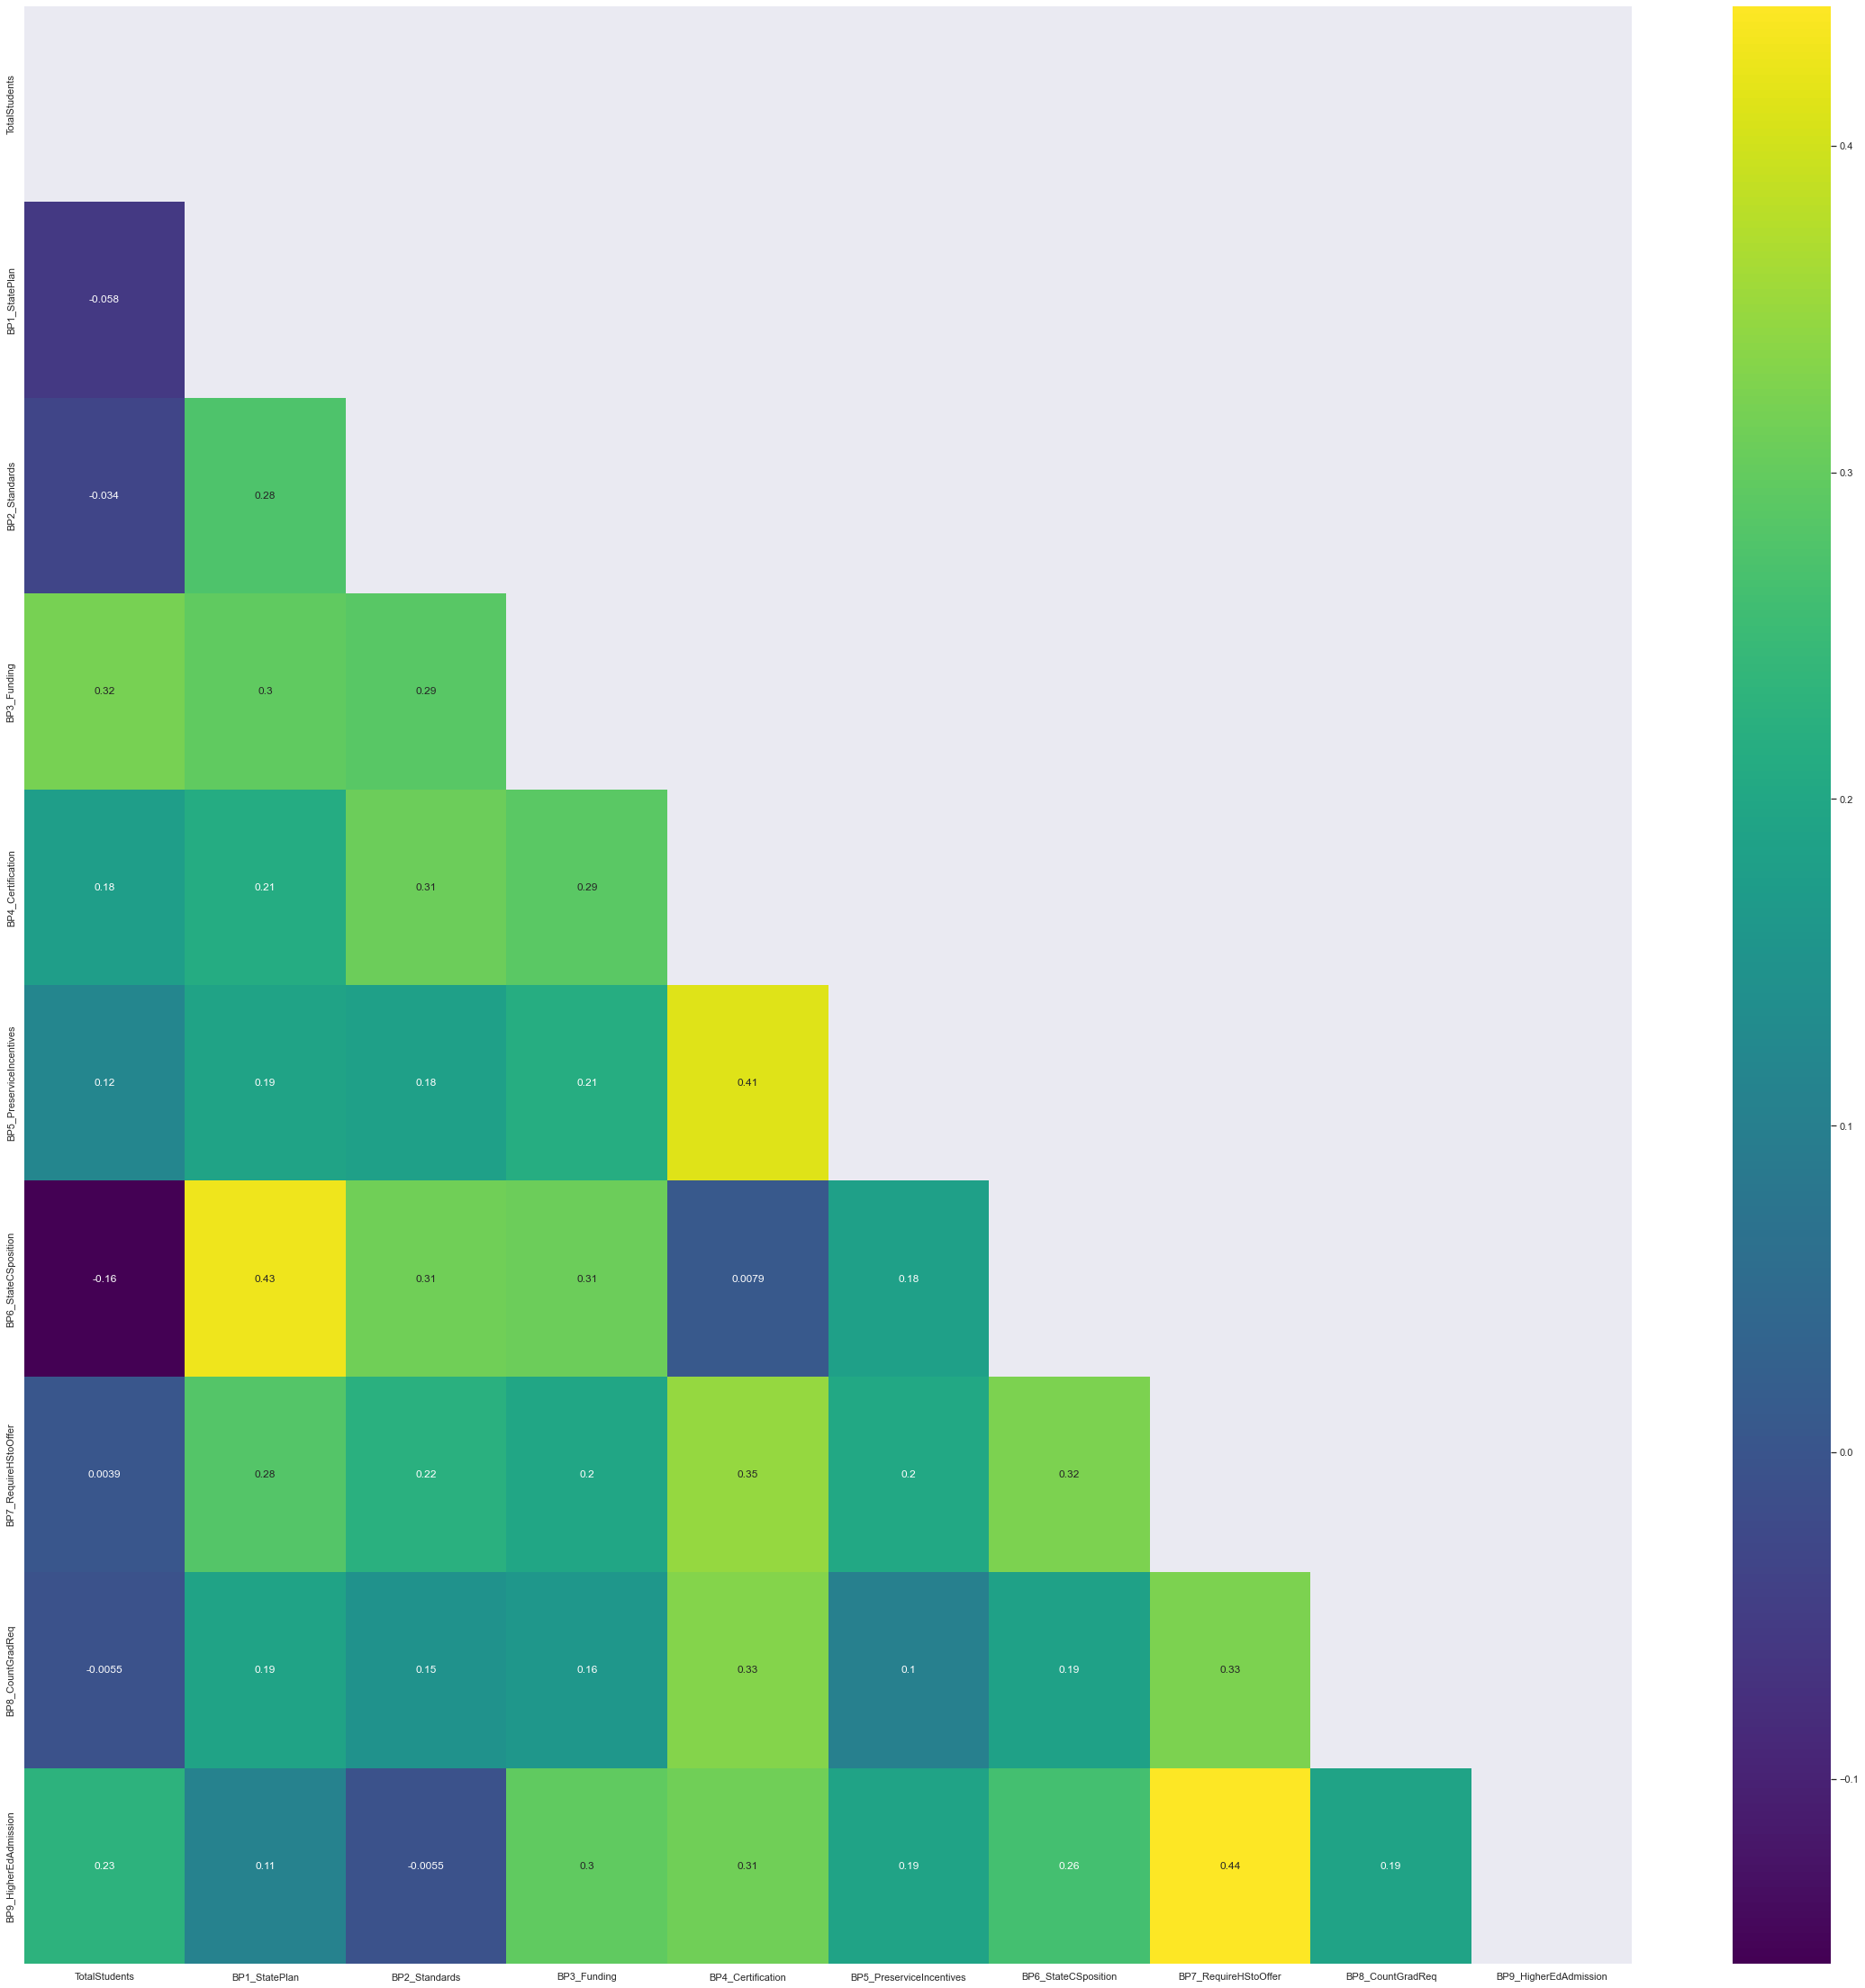

In [67]:
corrPolicies =dfwork[['TotalStudents'] + policiesB].corr()
mask = np.zeros_like(corrPolicies)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(40,40))
sns.heatmap(corrPolicies, mask=mask,  annot=True, cmap="viridis")
# plt.savefig("policycorr.png")

<AxesSubplot:>

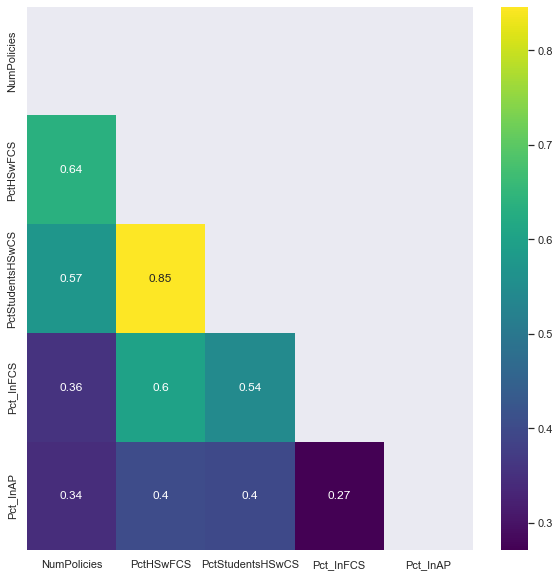

In [65]:
corrSuccess =dfwork[['NumPolicies','PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP']].corr()
mask = np.zeros_like(corrSuccess)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corrSuccess, mask=mask,  annot=True, cmap="viridis")

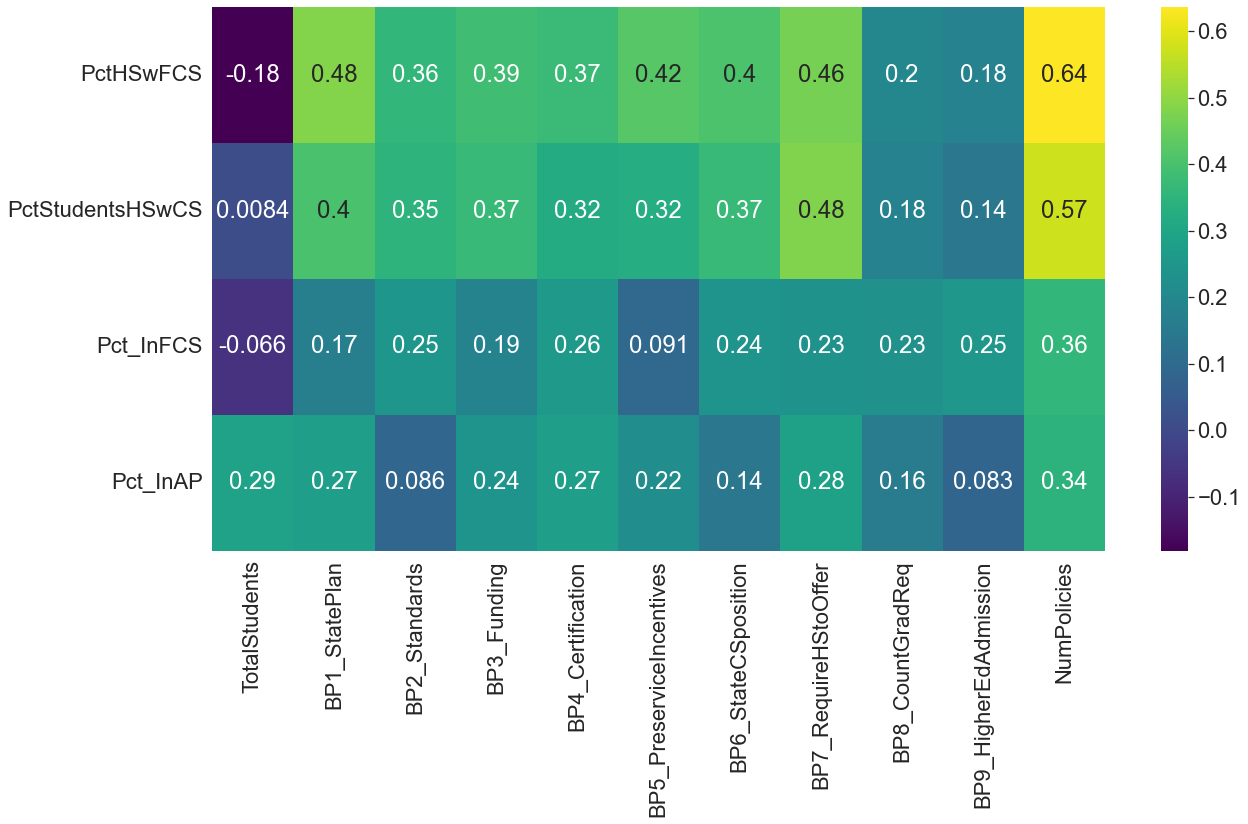

In [12]:
corrSuccess=dfwork[['TotalStudents'] + policiesB + ['NumPolicies','PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP']].corr()
mask = np.zeros_like(corrSuccess)
for i in (['TotalStudents'] + policiesB + ['NumPolicies']):
    corrSuccess.drop(i, axis=0, inplace=True)
for j in (['PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP']):  
    corrSuccess.drop(j, axis=1, inplace=True)
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.heatmap(corrSuccess, annot=True, cmap="viridis")
sns.set(font_scale=1)

#print(corrSuccess)


In [13]:
def SuccessRegressionsAgainstPolicies(success_metric, desc_string):
    
    d = np.polyfit(dfwork['NumPolicies'],dfwork[success_metric],1)
    f = np.poly1d(d)
    dfwork['CalcRegression'] = f(dfwork['NumPolicies'])
    r2_policies = r2_score(dfwork[success_metric],dfwork['CalcRegression'])
    regline = "Line of regression: " + "{:.4f}".format(f[1]) + " x + " + "{:.4f}".format(f[0])  
    r2comment = "R2: " + "{:.4f}".format(r2_policies)
    
    plt.figure(figsize=(8,8))
    ax = plt.axes()
    plt.scatter(x=dfwork['NumPolicies'], y=dfwork[success_metric], s=dfwork['TotalStudents']/25000)
    plt.plot(dfwork['NumPolicies'], dfwork['CalcRegression'], c='r')
    plt.xlabel('# of Pro-CSEd Policies Implemented')
    plt.ylabel(desc_string)
    plt.title('# of Pro-CS Policies vs. ' + desc_string)
    plt.text(0.1,0.9, regline, transform=ax.transAxes,fontsize=11)
    plt.text(0.1,0.85, r2comment, transform=ax.transAxes,fontsize=11)
    plt.show()


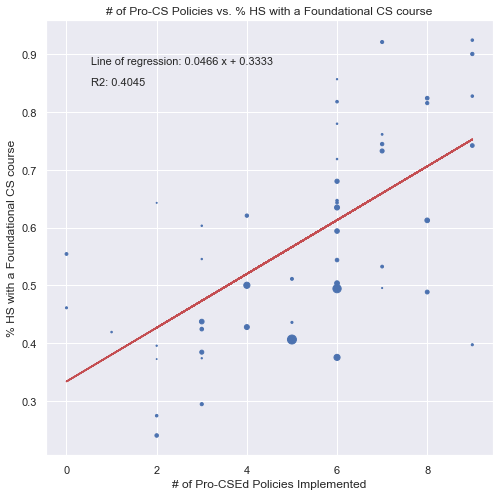

In [14]:
SuccessRegressionsAgainstPolicies('PctHSwFCS','% HS with a Foundational CS course')

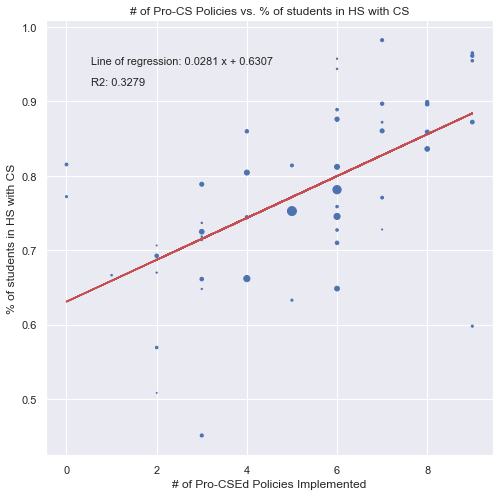

In [15]:
SuccessRegressionsAgainstPolicies('PctStudentsHSwCS','% of students in HS with CS')

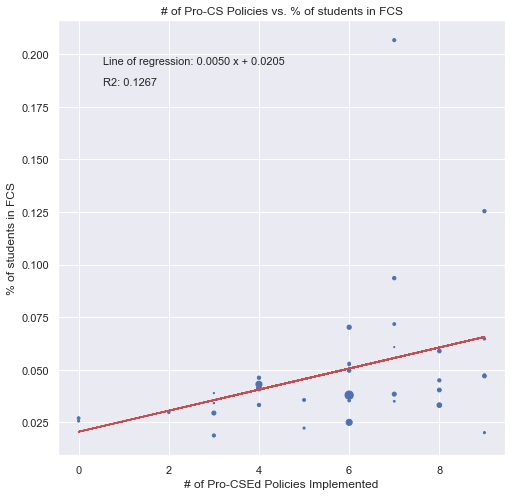

In [16]:
# Special logic since only 37 states for students in FCS

dfwork_f = dfwork.loc[dfwork['Pct_InFCS'].notnull()].copy()   # since can't handle null
d = np.polyfit(dfwork_f['NumPolicies'],dfwork_f['Pct_InFCS'],1)
f = np.poly1d(d)
dfwork_f['CalcRegression'] = f(dfwork_f['NumPolicies'])
r2_policies = r2_score(dfwork_f['Pct_InFCS'],dfwork_f['CalcRegression'])
regline = "Line of regression: " + "{:.4f}".format(f[1]) + " x + " + "{:.4f}".format(f[0])  
r2comment = "R2: " + "{:.4f}".format(r2_policies)

plt.figure(figsize=(8,8))
ax = plt.axes()
plt.scatter(x=dfwork_f['NumPolicies'], y=dfwork_f['Pct_InFCS'], s=dfwork_f['TotalStudents']/25000)
plt.plot(dfwork_f['NumPolicies'], dfwork_f['CalcRegression'], c='r')
plt.xlabel('# of Pro-CSEd Policies Implemented')
plt.ylabel('% of students in FCS')
plt.title('# of Pro-CS Policies vs. % of students in FCS')
plt.text(0.1,0.9, regline, transform=ax.transAxes,fontsize=11)
plt.text(0.1,0.85, r2comment, transform=ax.transAxes,fontsize=11)
plt.show()

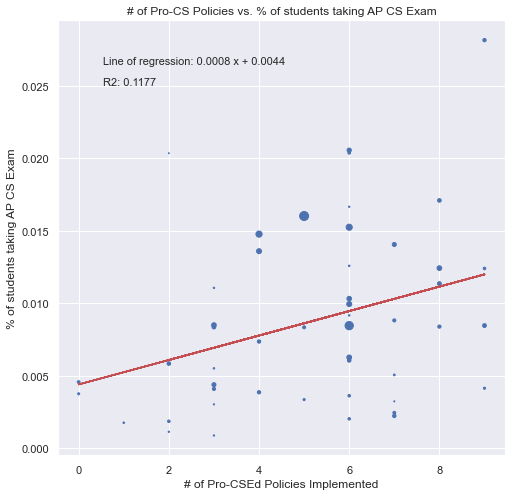

In [17]:
SuccessRegressionsAgainstPolicies('Pct_InAP','% of students taking AP CS Exam')

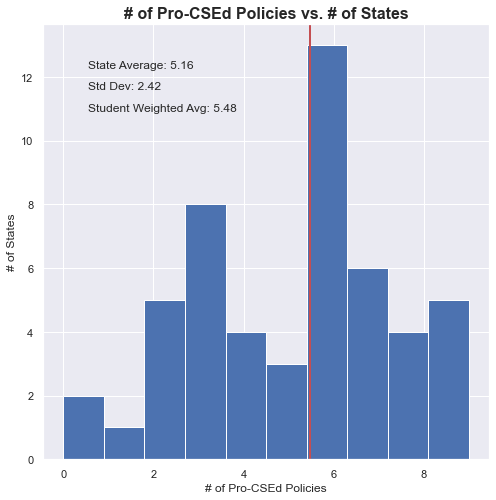

In [18]:
# Find total aggregations for Num of Policies
dfwork['PolicyWt'] = dfwork['TotalStudents'] * dfwork['NumPolicies']
aggdfP = dfwork.agg({'StateAbbv':'count','NumPolicies':'mean', 'TotalStudents':'sum', 'PolicyWt': 'sum' })
NumPolicies_StAvg = aggdfP['NumPolicies']
NumPolicies_StDev = np.std(df['NumPolicies'])
NumPolicies_WtAvg = aggdfP['PolicyWt']/aggdfP['TotalStudents']

plt.figure(figsize=(8,8))
ax = plt.axes()
plt.hist(x=dfwork['NumPolicies'], bins=10)
plt.xlabel('# of Pro-CSEd Policies')
plt.ylabel('# of States')
plt.title('# of Pro-CSEd Policies vs. # of States' ,fontsize=16, fontweight='bold')
plt.text(0.1,0.9, "State Average: " + str(round(NumPolicies_StAvg,2)), transform=ax.transAxes,fontsize=12)
plt.text(0.1,0.85, "Std Dev: " + str(round(NumPolicies_StDev,2)), transform=ax.transAxes,fontsize=12)
plt.text(0.1,0.8, "Student Weighted Avg: " + str(round(NumPolicies_WtAvg,2)), transform=ax.transAxes,fontsize=12)
plt.axvline(NumPolicies_WtAvg, color='r', linewidth=2)
plt.show()


In [19]:
def agg_policy_all(mydf, policy_binary,s_stateval, s_stateden, s_statenum, ndx):
    aggdf = mydf.groupby(policy_binary).agg({'StateAbbv':'count',s_stateval:'mean', s_stateden:'sum', s_statenum: 'sum' })
    row0 =  aggdf.loc[0]
    row1 =  aggdf.loc[1]
    ret_row = {'Policy': policy_binary[1:]}
    ret_row.update({'Cnt0':row0['StateAbbv'],'Cnt1':row1['StateAbbv'],'StAvg0':row0[s_stateval],'StAvg1':row1[s_stateval]})
    ret_row.update({'WStAvg0': row0[s_statenum] / row0[s_stateden], 'WStAvg1': row1[s_statenum] / row1[s_stateden]})
    return pd.DataFrame(ret_row,[ndx]) 

In [20]:
def build_policy_dataframe_all(statdf, s_stateval, s_stateden, s_statenum):
    s_StAvg = statdf[s_stateval].mean()
    s_WtAvg = statdf[s_statenum].sum()/statdf[s_stateden].sum()

    policy_columns = ['Policy','Cnt0','Cnt1','StAvg0','StAvg1','WStAvg0','WStAvg1']
    policydf = pd.DataFrame(columns=policy_columns)

    i = 0
    for polB in policiesB: 
        policydf = pd.concat([policydf, agg_policy_all(statdf, polB, s_stateval, s_stateden, s_statenum, i)])
        i = i + 1

    policydf.set_index('Policy')
    policydf['PctImplemented'] = policydf['Cnt1']/(policydf['Cnt1'] + policydf['Cnt0'])
    policydf['StAvgDiff'] = policydf['StAvg1'] - policydf['StAvg0']
    policydf['WStAvgDiff'] = policydf['WStAvg1'] - policydf['WStAvg0']
    policydf['StAvgDiffPct'] = policydf['StAvgDiff']/s_StAvg
    policydf['WStAvgDiffPct'] = policydf['WStAvgDiff']/s_WtAvg

    return policydf
    

In [21]:
policy_aggL1 = build_policy_dataframe_all(df, 'PctHSwFCS','NumOfHS','NumHSWithCS')
natmean_aggL1 = df['NumHSWithCS'].sum()/df['NumOfHS'].sum()
statemean_aggL1 = df['PctHSwFCS'].mean()

In [22]:
policy_aggL2 = build_policy_dataframe_all(df, 'PctStudentsHSwCS', 'TotalStudents','NumStudentsinHSwCS')
natmean_aggL2 = df['NumStudentsinHSwCS'].sum()/df['TotalStudents'].sum()
statemean_aggL2 = df['PctStudentsHSwCS'].mean()

In [23]:
df_onlyfcs = df.loc[df['InFCS_Total'].notnull()] 
policy_aggL3 = build_policy_dataframe_all(df_onlyfcs, 'Pct_InFCS', 'TotalStudents','InFCS_Total')
natmean_aggL3 = df_onlyfcs['InFCS_Total'].sum()/df_onlyfcs['TotalStudents'].sum()
statemean_aggL3 = df_onlyfcs['Pct_InFCS'].mean()

In [24]:
policy_aggL4 = build_policy_dataframe_all(df, 'Pct_InAP', 'TotalStudents','AP_Total')
natmean_aggL4 = df['AP_Total'].sum()/df['TotalStudents'].sum()
statemean_aggL4 = df['Pct_InAP'].mean()

In [25]:
policy_aggL1['PolicyComment'] = policy_aggL1['Policy'].apply(lambda x: x[0:2]) + " (" + (policy_aggL1['PctImplemented']).apply("{:.0%}".format) + ")"
policy_aggL2['PolicyComment'] = policy_aggL2['Policy'].apply(lambda x: x[0:2]) + " (" + (policy_aggL2['PctImplemented']).apply("{:.0%}".format) + ")"
policy_aggL3['PolicyComment'] = policy_aggL3['Policy'].apply(lambda x: x[0:2]) + " (" + (policy_aggL3['PctImplemented']).apply("{:.0%}".format) + ")"
policy_aggL4['PolicyComment'] = policy_aggL4['Policy'].apply(lambda x: x[0:2]) + " (" + (policy_aggL4['PctImplemented']).apply("{:.0%}".format) + ")"


In [26]:
policy_aggL1['PolicyComment']

0    P1 (41%)
1    P2 (76%)
2    P3 (59%)
3    P4 (80%)
4    P5 (41%)
5    P6 (61%)
6    P7 (45%)
7    P8 (71%)
8    P9 (41%)
Name: PolicyComment, dtype: object

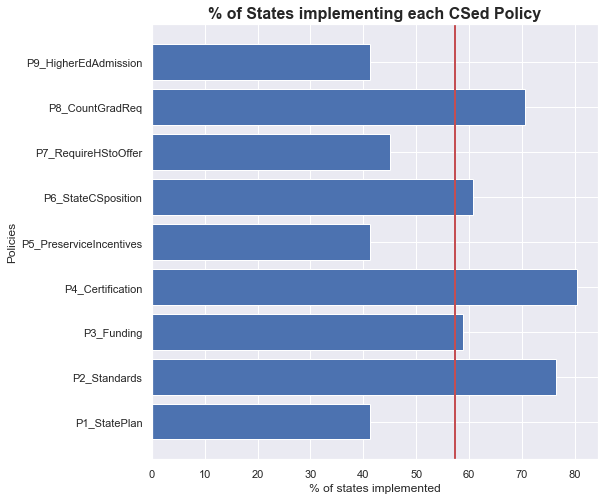

In [32]:
plt.figure(figsize=(8,8))
ax = plt.axes()
plt.barh(y = policy_aggL1['Policy'], width=(policy_aggL1['PctImplemented'] * 100))
plt.xlabel('% of states implemented')
plt.ylabel('Policies')
plt.title('% of States implementing each CSed Policy' ,fontsize=16, fontweight='bold')
#plt.text(0.1,0.9, "State Average: " + str(round(NumPolicies_StAvg,2)), transform=ax.transAxes,fontsize=12)
#plt.text(0.1,0.85, "Std Dev: " + str(round(NumPolicies_StDev,2)), transform=ax.transAxes,fontsize=12)
#plt.text(0.1,0.8, "Student Weighted Avg: " + str(round(NumPolicies_WtAvg,2)), transform=ax.transAxes,fontsize=12)
plt.axvline(policy_aggL1['PctImplemented'].mean() * 100, color='r', linewidth=2)
plt.show()

In [33]:
def absoluteDiffChartWtAvg(mydf,stat,natavg):
    plt.figure(figsize=(80,60))
    policy_agg_chart = mydf[['PolicyComment','WStAvg0','WStAvg1']].copy()
    policy_agg_chart['WStAvg0'] =  policy_agg_chart['WStAvg0'] * 100
    policy_agg_chart['WStAvg1'] =  policy_agg_chart['WStAvg1'] * 100
    policy_agg_chart.rename(columns = {'WStAvg0':'w/o Policy','WStAvg1':'w/ Policy'}, inplace = True)
    policy_agg_chart.plot(kind='bar', x='PolicyComment', color=['orange', 'lightgreen'])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Policy vs. " + stat + " \n(Weighted Avg)", fontsize=16, fontweight='bold')
    ax = plt.gca()
    ax.set(xlabel=None)
    plt.axhline(natavg * 100, color='r', linewidth=2)
    plt.show()
    

<Figure size 5760x4320 with 0 Axes>

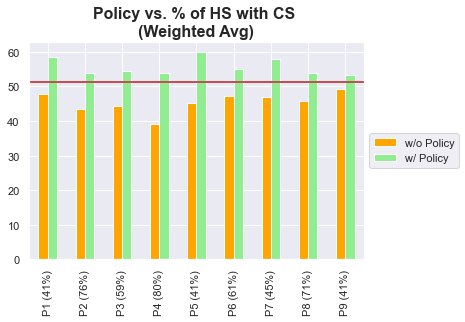

In [34]:
absoluteDiffChartWtAvg(policy_aggL1,"% of HS with CS", natmean_aggL1)

<Figure size 5760x4320 with 0 Axes>

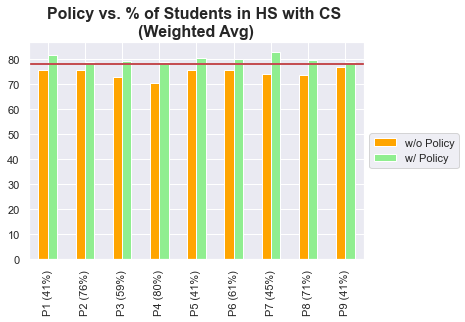

In [35]:
absoluteDiffChartWtAvg(policy_aggL2,"% of Students in HS with CS", natmean_aggL2)

<Figure size 5760x4320 with 0 Axes>

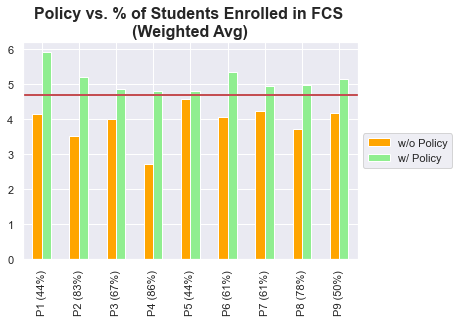

In [36]:
absoluteDiffChartWtAvg(policy_aggL3,"% of Students Enrolled in FCS", natmean_aggL3)

<Figure size 5760x4320 with 0 Axes>

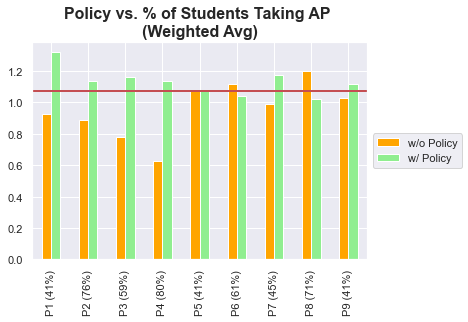

In [37]:
absoluteDiffChartWtAvg(policy_aggL4,"% of Students Taking AP", natmean_aggL4)

<Figure size 720x720 with 0 Axes>

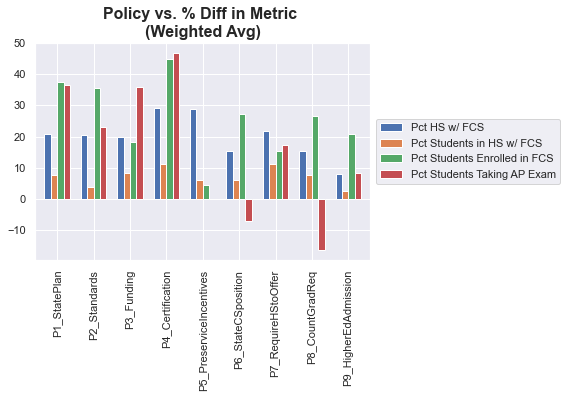

In [38]:
pctdiff = pd.DataFrame()
pctdiff['Policy'] = policy_aggL1['Policy']
#pctdiff['PolicyComment'] = policy_aggL1['PolicyComment']
pctdiff['Pct HS w/ FCS'] = policy_aggL1['WStAvgDiffPct'] * 100
pctdiff['Pct Students in HS w/ FCS'] = policy_aggL2['WStAvgDiffPct'] * 100
pctdiff['Pct Students Enrolled in FCS'] = policy_aggL3['WStAvgDiffPct'] * 100
pctdiff['Pct Students Taking AP Exam'] = policy_aggL4['WStAvgDiffPct'] * 100

plt.figure(figsize=(10,10))
pctdiff.plot(kind='bar', x='Policy', width=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Policy vs. % Diff in Metric \n(Weighted Avg)", fontsize=16, fontweight='bold')
ax = plt.gca()
ax.set(xlabel=None)
plt.show()


<Figure size 5760x4320 with 0 Axes>

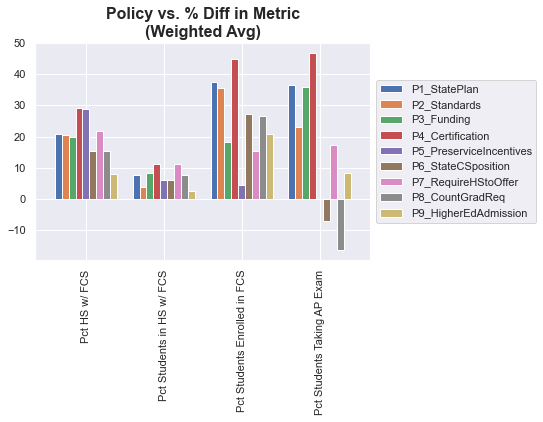

In [39]:
pctdifftrans = pctdiff.transpose()
pctdifftrans.columns = pctdifftrans.iloc[0]
pctdifftrans.drop('Policy', axis=0, inplace=True)

plt.figure(figsize=(80,60))
pctdifftrans.plot(kind='bar', width=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Policy vs. % Diff in Metric\n(Weighted Avg)", fontsize=16, fontweight='bold')
ax = plt.gca()
ax.set(xlabel=None)
plt.show()


In [40]:
def absoluteDiffChartStAvg(mydf,stat,natavg):
    plt.figure(figsize=(80,60))
    policy_agg_chart = mydf[['PolicyComment','StAvg0','StAvg1']].copy()
    policy_agg_chart['StAvg0'] =  policy_agg_chart['StAvg0'] * 100
    policy_agg_chart['StAvg1'] =  policy_agg_chart['StAvg1'] * 100
    policy_agg_chart.rename(columns = {'StAvg0':'w/o Policy','StAvg1':'w/ Policy'}, inplace = True)
    policy_agg_chart.plot(kind='bar', x='PolicyComment', color=['orange', 'lightgreen'])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Policy vs. " + stat + " \n(State Avg)", fontsize=16, fontweight='bold')
    ax = plt.gca()
    ax.set(xlabel=None)
    plt.axhline(natavg * 100, color='r', linewidth=2)
    plt.show()

<Figure size 5760x4320 with 0 Axes>

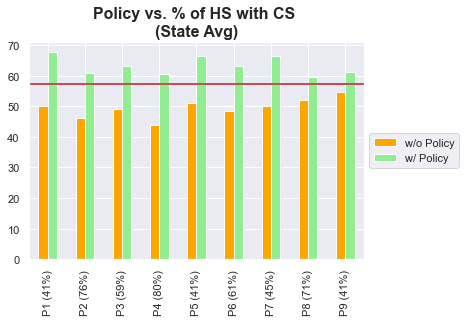

In [41]:
absoluteDiffChartStAvg(policy_aggL1,"% of HS with CS", statemean_aggL1)

<Figure size 5760x4320 with 0 Axes>

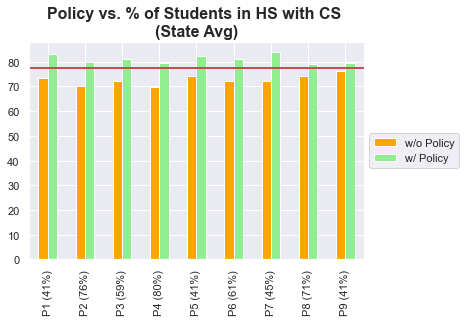

In [42]:
absoluteDiffChartStAvg(policy_aggL2,"% of Students in HS with CS", statemean_aggL2)

<Figure size 5760x4320 with 0 Axes>

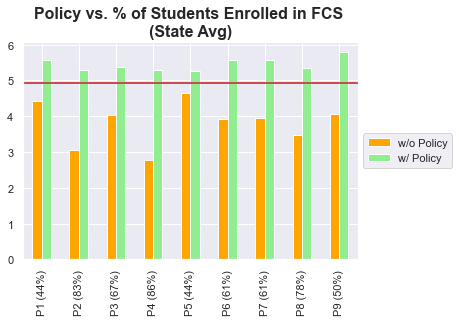

In [43]:
absoluteDiffChartStAvg(policy_aggL3,"% of Students Enrolled in FCS", statemean_aggL3)

<Figure size 5760x4320 with 0 Axes>

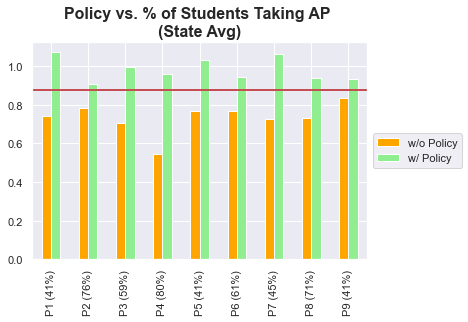

In [44]:
absoluteDiffChartStAvg(policy_aggL4,"% of Students Taking AP", statemean_aggL4)

<Figure size 720x720 with 0 Axes>

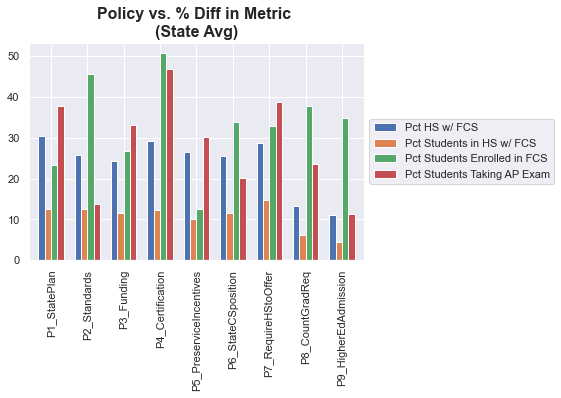

In [45]:
pctdiff = pd.DataFrame()
pctdiff['Policy'] = policy_aggL1['Policy']
#pctdiff['PolicyComment'] = policy_aggL1['PolicyComment']
pctdiff['Pct HS w/ FCS'] = policy_aggL1['StAvgDiffPct'] * 100
pctdiff['Pct Students in HS w/ FCS'] = policy_aggL2['StAvgDiffPct'] * 100
pctdiff['Pct Students Enrolled in FCS'] = policy_aggL3['StAvgDiffPct'] * 100
pctdiff['Pct Students Taking AP Exam'] = policy_aggL4['StAvgDiffPct'] * 100

plt.figure(figsize=(10,10))
pctdiff.plot(kind='bar', x='Policy', width=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Policy vs. % Diff in Metric \n(State Avg)", fontsize=16, fontweight='bold')
ax = plt.gca()
ax.set(xlabel=None)
plt.show()

<Figure size 5760x4320 with 0 Axes>

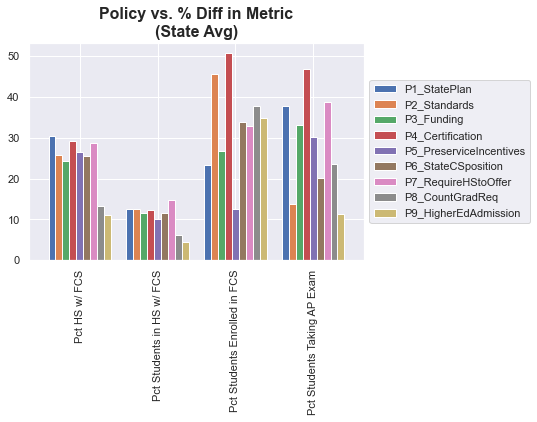

In [46]:
pctdifftrans = pctdiff.transpose()
pctdifftrans.columns = pctdifftrans.iloc[0]
pctdifftrans.drop('Policy', axis=0, inplace=True)

plt.figure(figsize=(80,60))
pctdifftrans.plot(kind='bar', width=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Policy vs. % Diff in Metric\n(State Avg)", fontsize=16, fontweight='bold')
ax = plt.gca()
ax.set(xlabel=None)
plt.show()

In [61]:
print (natmean_aggL1)
print (statemean_aggL1)

0.5129529742459925
0.57364578


In [55]:
print (dfwork[['StateName','NumPolicies']])

               StateName  NumPolicies
0                 Alaska            1
1                Alabama            8
2               Arkansas            9
3                Arizona            3
4             California            5
5               Colorado            3
6            Connecticut            6
7   District of Columbia            2
8               Delaware            3
9                Florida            6
10               Georgia            8
11                Hawaii            6
12                  Iowa            6
13                 Idaho            9
14              Illinois            4
15               Indiana            9
16                Kansas            2
17              Kentucky            5
18             Louisiana            3
19         Massachusetts            8
20              Maryland            9
21                 Maine            3
22              Michigan            3
23             Minnesota            2
24              Missouri            4
25          